In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#import dataset
advertising_data = pd.read_csv("Advertising.csv")
advertising_data = advertising_data.drop(columns=['Unnamed: 0'])

#set variables
X = advertising_data[['TV','Radio','Newspaper']].values
Y = advertising_data['Sales'].values

In [2]:
#standardization
mean = np.mean(X, axis=0)  #compute mean of each column
std = np.std(X, axis=0)    #compute std deviation of each column
X = (X - mean) / std

In [3]:
#adding ones
X = np.c_[np.ones(X.shape[0]), X]

In [4]:
#dividing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

Optimal Weights: [14.04639848  3.80310885  2.92107602 -0.05958152]


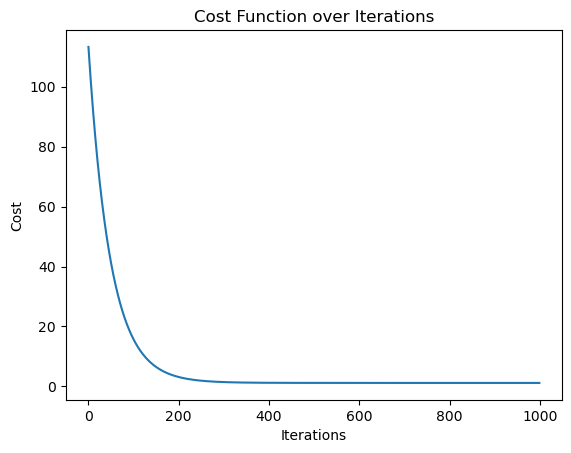

In [5]:
#functions
def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w

def predict(X, weights):
    return np.dot(X, weights)

def compute_cost(y_true, y_pred):
    m = len(y_true)
    return (1/(2*m)) * np.sum((y_pred - y_true)**2)

def compute_gradient(X, y_true, y_pred):
    m = len(y_true)
    return (1/m) * np.dot(X.T, (y_pred - y_true))

def update_weights(weights, gradients, learning_rate):
    return weights - learning_rate * gradients

def grad_descent(X, Y, weights, learning_rate, iterations):
    m = len(Y)
    #store cost and weights at each iteration
    cost_history = [] 
    weights_history = []

    for i in range(iterations):
        y_pred = predict(X, weights)
        cost = compute_cost(Y, y_pred)
        gradients = compute_gradient(X, Y, y_pred)
        weights = update_weights(weights, gradients, learning_rate)
        
        cost_history.append(cost)
        weights_history.append(weights)
    
    return weights, cost_history

def plot_costs(interations, cost_history):
    plt.plot(range(iterations), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.show()
    
#initialize weights
initial_weights = initialize_weights()

learning_rate = 0.01
iterations = 1000

#train the model
optimal_weights, cost_history = grad_descent(X_train, y_train, initial_weights, learning_rate, iterations)

print("Optimal Weights:", optimal_weights)

#plot the cost over iterations
plot_costs(iterations, cost_history)

#predictions for train and test sets
y_train_pred = predict(X_train, optimal_weights)
y_test_pred = predict(X_test, optimal_weights)

In [6]:
#calculate MSE using the cost function
mse_train = compute_cost(y_train, y_train_pred)
print(f"Mean Squared Error on the Training Set: {mse_train}")

Mean Squared Error on the Training Set: 1.1815973025078885


In [7]:
#calculate MSE using the cost function
mse_test = compute_cost(y_test, y_test_pred)
print(f"Mean Squared Error on the Testing Set: {mse_test}")

Mean Squared Error on the Testing Set: 2.676495400310715


In [8]:
print(f"Linear Model: h(x) = {optimal_weights[0]} + {optimal_weights[1]} * TV + {optimal_weights[2]} * Radio + {optimal_weights[3]} * Newspaper")

Linear Model: h(x) = 14.046398482807863 + 3.8031088475973664 * TV + 2.921076018418599 * Radio + -0.05958152489099824 * Newspaper


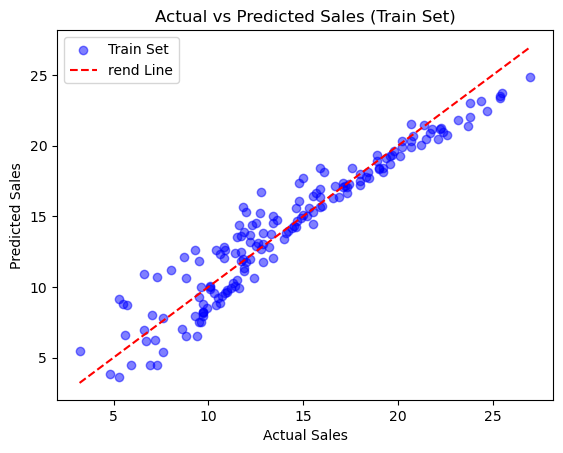

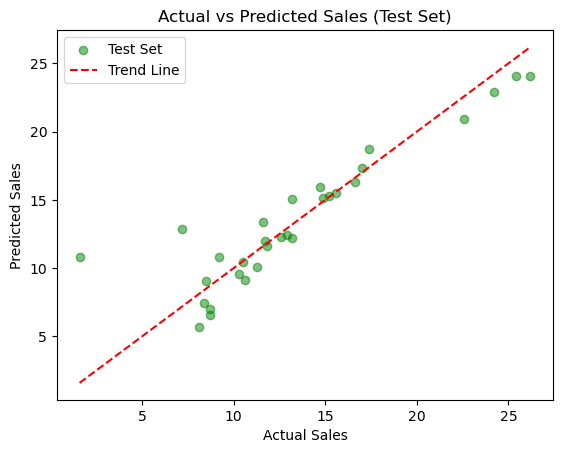

Train MSE: 2.363194605015777
Test MSE: 5.35299080062143
Train R²: 0.9103952131662311
Test R²: 0.8248219756473407


In [9]:
#plot the scatter plot for the training set
plt.scatter(y_train, y_train_pred, color='blue', label='Train Set', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='rend Line') 
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Train Set)')
plt.legend()
plt.show()

#plot the scatter plot for the test set
plt.scatter(y_test, y_test_pred, color='green', label='Test Set', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Trend Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.legend()
plt.show()

#calculate MSE for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#calculate R² score for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R²:", train_r2)
print("Test R²:", test_r2)

Optimal Weights: [14.04707003  3.80331114  2.92303105 -0.06154266]


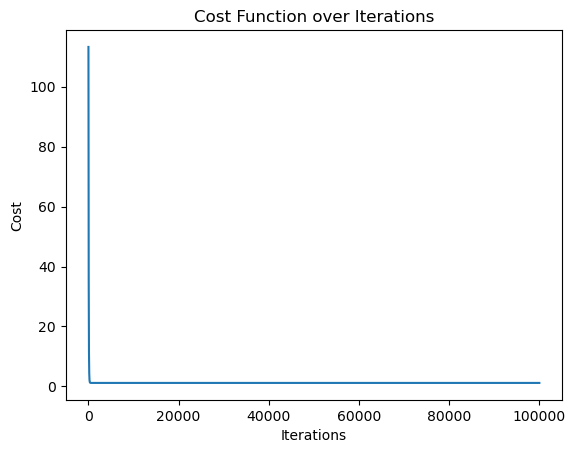

Train MSE: 2.363194605015777
Train R²: 0.9103952131662311
Test MSE: 5.35299080062143
Test R²: 0.8248219756473407


In [10]:
iterations = 100000
#train the model
optimal_weights, cost_history = grad_descent(X_train, y_train, initial_weights, learning_rate, iterations)

print("Optimal Weights:", optimal_weights)

#plot the cost over iterations
plot_costs(iterations, cost_history)

#calculate MSE for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#calculate R² score for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train R²:", train_r2)
print("Test MSE:", test_mse)
print("Test R²:", test_r2)

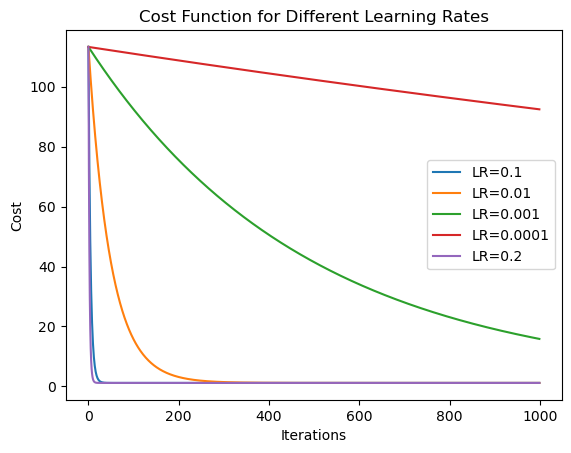

In [11]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
costs_lr = {}   #stores cost history per learning rate

iterations = 1000
for lr in learning_rates:
    _, cost_history = grad_descent(X_train, y_train, initial_weights, lr, iterations)
    costs_lr[lr] = cost_history

#plot cost functions for different learning rates
for lr, cost in costs_lr.items():
    plt.plot(range(iterations), cost, label=f'LR={lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function for Different Learning Rates')
plt.legend()
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression

#fit model using OLS
ols_model = LinearRegression().fit(X_train[:, 1:], y_train)  # Exclude bias column

#OLS performance
ols_mse = mean_squared_error(y_true=y_test, y_pred=ols_model.predict(X_test[:, 1:]))
ols_r2 = r2_score(y_true=y_test, y_pred=ols_model.predict(X_test[:, 1:]))

print("OLS Test MSE:", ols_mse)
print("OLS Test R²:", ols_r2)

OLS Test MSE: 5.355774782431244
OLS Test R²: 0.8247308691142937
